## Analyze A/B Test Results


## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

For this project, I will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page. I will also fit a logistic regression models to understand factors are correlate with a higher conversion rate. 


<a id='probability'></a>
#### Part I - Probability


In [5]:
#import necessary libraries

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#setting the seed value as 42. This will always generate a random number based on the seed value, so if the seed value is 10, we will always get 0.5714025946899135 as the first random number.

random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`. 

In [7]:
df = pd.read_csv('C:\\Users\\hangt\\OneDrive\\Máy tính\\Udacity_data analyst\\Project 3 - AB testing\\analyzeabtestresults-2\\AnalyzeABTestResults 2\\ab_data.csv')

df.head(10)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
7,719014,2017-01-17 01:48:29.539573,control,old_page,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


b. Find the number of rows in the dataset.

In [8]:
#using shape[0] or len(df)

df.shape[0]

294478

c. The number of unique users in the dataset.

In [9]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [10]:
df.query('converted == 1').converted.count()/df.converted.count()

#note that df.query method will return a dataframe

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [11]:
#return a series of boolean values, where True means the treatment group and False means the control group
df['group'] == 'treatment' 

0         False
1         False
2          True
3          True
4         False
          ...  
294473    False
294474    False
294475    False
294476    False
294477     True
Name: group, Length: 294478, dtype: bool

In [12]:
#return a series of boolean values, where True means new_page and False means old_page

df['landing_page'] == 'new_page'

0         False
1         False
2          True
3          True
4         False
          ...  
294473    False
294474    False
294475    False
294476    False
294477     True
Name: landing_page, Length: 294478, dtype: bool

In [90]:
#to make the code easy to read, I will create a series named df_count with boolean values of when group and landing_page line up or not.

df_count = (df['group'] == 'treatment') == (df['landing_page'] == 'new_page')

#convert df_count to list since list has the count(False) method
#count the number of False values

list(df_count).count(False)

#the number of rows where treatment group and new landing page don't line up is:

3893

f. Do any of the rows have missing values?

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


Fortunately, there are no missing values in this data set

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page. 

>Therefore, I will remove those rows.

a. I will clean the data set to make sure it meet the specifications and will store it in a new dataframe called **df2**.

In [92]:
#since df[df_count == False] will return a dataframe while the drop function can only drop based on index
#use the .index method to create a list of indexes

df2 = df.drop(df[df_count == False].index)

In [93]:
# Double Check all of the correct rows were removed - this should be 0

df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and answer some questions

a. How many unique **user_id**s are in **df2**?

In [94]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [21]:
df2[df2.duplicated('user_id')] 

#this code will slice the df2 dataframe using the boolean vector df2.duplicated('user_id')

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [22]:
#based on the result above or using the index method

df2[df2.duplicated('user_id')].index

#therefore, the duplicated user_id located at row index 2893

Int64Index([2893], dtype='int64')

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [97]:
df2 = df2[~df2.duplicated('user_id')] 

#using tilda '~' to turn all the False elements to True and then use that to slice and dice

In [98]:
df2

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


`4.` Use **df2** in the below cells to answer questions regarding probabilities

a. What is the probability of an individual converting regardless of the page they receive?

In [99]:
df2.query('converted == 1').converted.count()/df2.converted.count()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [100]:
#create a dataframe called df_control_group that consists of only control group rows

df_control_group = df2.query('group == "control"')

In [22]:
df_control_group.query('converted == 1').shape[0] / df_control_group.shape[0]

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [23]:
df_treatment_group = df2.query('group == "treatment"')

df_treatment_group.query('converted == 1').shape[0] / df_treatment_group.shape[0]

0.11880806551510564

d. What is the probability that an individual received the new page?

In [25]:
df2.query('landing_page == "new_page"').shape[0] / df2.shape[0]

0.5000619442226688

e. Considering the results from a. through d. above, and explain whether there is sufficient evidence to say that the new treatment page leads to more conversions.

Based on the prelimilary calculations above, there is not sufficient evidence to day that the new treatment page leads to more conversions. This is because the probability that an individual received new page is slightly higher than he/she received old page while the conversion rate among control group is slightly higher than the conversion rate among the treatment page.

Also, this result derived from a sample, we have not done any hypothesis testing to conclude about the population parameters. 

<a id='ab_test'></a>
### Part II - A/B Test

`1.` Since I want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, the null and alternative hypotheses can be stated as:  


$H_0$: $p_{new}$ <= $p_{old}$

$H_a$: $p_{new}$ > $p_{old}$

Where: 
- **$p_{old}$** is the true/population converted rate for the old page
- **$p_{new}$** is the true/population conversion rate for the new page

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.

a. What is the **convert rate** for $p_{new}$ under the null? 

In [106]:
#since under the Null hypothesis, p_new and p_old are equal and equal to the coverted rate 
#for the whole data set regarless of which page

p_new = df2.converted.mean()

p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [107]:
#since under the Null hypothesis, p_new and p_old are equal and equal to the coverted rate 
#for the whole data set regarless of which page

p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$? - the number of rows associated with the new group

In [108]:
n_new = df2.query('group == "treatment"').shape[0]

In [109]:
n_new

145310

d. What is $n_{old}$? - number of rows associated with the old group

In [110]:
n_old = df2.query('group == "control"').shape[0]

n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [119]:
new_page_converted = np.random.binomial(n_new, p_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [124]:
old_page_converted = np.random.binomial(n_old, p_old) 

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [128]:
simulated_diffs = new_page_converted/n_new - old_page_converted/n_old

In [129]:
simulated_diffs

0.0010440912090989851

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [135]:
#now creating sampling distributions:
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(n_new,p_new)
    ''''return a random number of conversions from the new page drawn from this binomial distribution'''
    old_page_converted = np.random.binomial(n_old, p_old) 
    ''''return a random number of conversions from the old page drawn from this binomial distribution'''
    diff = new_page_converted/n_new - old_page_converted/n_old
    p_diffs.append(diff)
    ''''this will create a sampling distribution of 10000 differences in sample proportions'''
    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

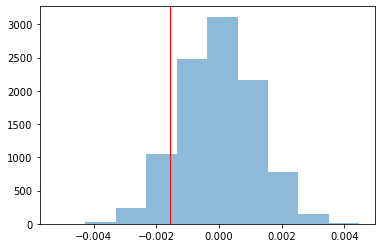

In [72]:
plt.hist(p_diffs, alpha = 0.5)
plt.axvline(actual_diffs, color = 'r', linewidth = 1);

This histogram of p_diffs is almost a normal distribution. The x-axis represents the differences in sample proportions with the spread from -0.004 to 0.004, the y-axis represents the frequency corresponding to each difference in sample proportions.


It is known that the distribution of sample proportions is normally distributed as long as there are at least 10 successes and 10 failures. Therefore, it is evident that the proportion of new converted page is normally distributed. Likewise, the proportion of old converted page is also normally distributed. p_diffs is the differences of two normally distributed variables. Therefore, p_diffs is normally distributed.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [143]:
#calculate the actual difference observed in ab_data.csv

actual_diffs = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
actual_diffs

-0.0015782389853555567

In [144]:
#to perform p_value calculation, p_diffs must be passed to an array

p_diffs = np.array(p_diffs)

print('The proportion of the p_diffs that are greater than the actual difference observed in ab_data.csv is {0:0.3f}'.format((p_diffs > actual_diffs).mean()))

The proportion of the p_diffs that are greater than the actual difference observed in ab_data.csv is 0.908


k. Explain the value computed in part j

The value of 0.908 computed in part `j` is called **p_value**. This is the probability of observing a proportion difference between the conversion rates of new page and old page as extreme as -0.0015 assuming that the null hypothesis is true. Since the p_value is very large (i.e 0.908), it's very likely that the value of -1.0015 came from the null hypothesis distribution and we do not have enough evidence to reject the null hypothesis. This also means that we can't prove that the new page yield higher conversion rates than the old page.


In [145]:
#Calculate Z statistic

std_dev = np.std(p_diffs)

print(std_dev)

0.0011839455825851284


In [146]:
Z_stat_manual = actual_diffs/std_dev

print(Z_stat_manual)

-1.3330333830964547


**Put your answer here.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [148]:
import statsmodels.api as sm

convert_old = df2.query('group == "control"').converted.sum()
convert_new = df2.query('group == "treatment"').converted.sum()
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

In [149]:
 from statsmodels.stats.proportion import proportions_ztest
z_stat, p_value = proportions_ztest(count =[convert_new, convert_old], nobs =[n_new, n_old], alternative = 'larger')

print('z_stat is {0:0.3f}'.format(z_stat), 'and','p_value is {0:0.3f}'.format(p_value))

z_stat is -1.311 and p_value is 0.905


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?



 The z statistic and p-value computed in `m.` agreed with the results calculated manually in parts `j.` and `k.`
 
 As explained in `k.` a p-value of 0.905 means that we do not have enough evidence to reject the hypothesis that new page has lower or the same conversion rate as new page. So, we should not roll out the new page as there are no evidence showing new page is better.
 
 z statistic is a summary statistic that represents the mean difference observed in ab_data.csv. z statistic mean that the extreme value observed in the ab_data.csv (i.e. -0.0015) is 1.311 standard deviation below the mean.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this part, I will see that the result you acheived in the previous A/B test can also be achieved by performing regression.<br><br>

Since the target variable 'converted' has binary values (i.e. 0 and 1), **logistic regression** is the most suitable model

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [154]:
#coding group into ab_page dummy variable

df2[['ab_page','old_page']] = pd.get_dummies(df['landing_page'])

In [152]:
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,old_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import the regression model.  Instantiate the model, and fit the model using the two columns I created in part **b.** (i.e. *ab_page* and *old_page*)  to predict whether or not an individual converts.

In [155]:
import statsmodels.api as sm

df2['intercept'] = 1
Logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']])
results = Logit_mod.fit()

results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2021-06-29 02:48 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

d. Logistic Regression Model Summary

 The model is logistic regression with 1 explanatory categorical variable *ab_page* and the categorical target variable *converted*. Both of them were dummy coded with 0 and 1 values before the model was fitted. Based on the model output, the coefficient of ab_page is -0.015 with a p-value of 0.1899.
 
 The coefficient means that when in new page, we expect a slight decrease in the odds of successful conversion by 1/e^(-0.015) = **1.015** (times)
 
 The p-value of 0.1899 means that the estimate for ab_page coefficient is not statistically significant and may not be true to estimate population coefficient.

e. What is the p-value associated with **ab_page**? Why does it differ from the value found in **Part II**?<br><br> 

As mentioned above, the p-value associated with ab_page is 0.1899. This is different from the p_value in the previous hypothesis test. This p_value informs us about the significance of the estimated coefficient for ab_page. 

The null hypothesis here is stated as: there is no logistic relationship between *ab_page* and *converted*. In other words, under the null, the coefficient of ab_page is 0.

The alternative hypothesis is stated as:there is a logistic relationship between *ab_page* and *converted*. In other words, under the null, the coefficient of ab_page is different from 0. 


Since the p-value is large (0.1899), there is not enough evidence to reject the null hypothesis, which means we can't prove that the true coefficient of ab_page is different from 0.





f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

There are factors we can add to the regression model, such as seasonality of the experiment, the amount of time the experiment is run, proficiency levels of user groups. 

However, there may be some challenges with adding more factors such as, but not limited to:
- Multicolineality error, meaning adding a variable that is correlated with another variable in the model
- Correlated Errors
- Outliers in the new variables may hurt the model

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. We will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

The question to answer is does it appear that country had an impact on conversion?

In [62]:
countries_df = pd.read_csv('C:\\Users\\hangt\\OneDrive\\Máy tính\\Udacity_data analyst\\Project 3 - AB testing\\analyzeabtestresults-2\\AnalyzeABTestResults 2\\countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [159]:
df_new.head()

,timestamp,landing_page,converted,ab_page,old_page,intercept,country_UK,country_US,UK_ab_page,US_ab_page
user_id,,,,,,,,,,
834778,2017-01-14 23:08:43.304998,old_page,0,0,1,1,1,0,0,0
928468,2017-01-23 14:44:16.387854,new_page,0,1,0,1,0,1,0,1
822059,2017-01-16 14:04:14.719771,new_page,1,1,0,1,1,0,1,0
711597,2017-01-22 03:14:24.763511,old_page,0,0,1,1,1,0,0,0
710616,2017-01-16 13:14:44.000513,new_page,0,1,0,1,1,0,1,0


In [64]:
#check the number of unique values in 'country' column

df_new['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

There are 3 unique countries: US, UK, Canada. Therefore, I will dummy code the 'country' categorical variable into 2 dummy variables.

In [65]:
df_new = pd.get_dummies(data=df_new, columns=['country'], prefix='country', drop_first=True)

In [158]:
df_new.head(3)

,timestamp,landing_page,converted,ab_page,old_page,intercept,country_UK,country_US,UK_ab_page,US_ab_page
user_id,,,,,,,,,,
834778,2017-01-14 23:08:43.304998,old_page,0,0,1,1,1,0,0,0
928468,2017-01-23 14:44:16.387854,new_page,0,1,0,1,0,1,0,1
822059,2017-01-16 14:04:14.719771,new_page,1,1,0,1,1,0,1,0


h. I would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

In [68]:
#create variable higher terms:

df_new['UK_ab_page'] = df_new['ab_page']*df_new['country_UK']
df_new['US_ab_page'] = df_new['ab_page']*df_new['country_US']

In [160]:
df_new.head()

,timestamp,landing_page,converted,ab_page,old_page,intercept,country_UK,country_US,UK_ab_page,US_ab_page
user_id,,,,,,,,,,
834778,2017-01-14 23:08:43.304998,old_page,0,0,1,1,1,0,0,0
928468,2017-01-23 14:44:16.387854,new_page,0,1,0,1,0,1,0,1
822059,2017-01-16 14:04:14.719771,new_page,1,1,0,1,1,0,1,0
711597,2017-01-22 03:14:24.763511,old_page,0,0,1,1,1,0,0,0
710616,2017-01-16 13:14:44.000513,new_page,0,1,0,1,1,0,1,0


In [161]:
### Fit the Logistic Regression Model And Obtain the Results

df_new['intercept'] = 1
Logit_md2 = sm.Logit(df_new['converted'], df_new[['intercept','UK_ab_page', 'US_ab_page', 'ab_page', 'country_US', 'country_UK']])
results2 = Logit_md2.fit()

results2.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2021-06-29 03:22 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
UK_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
US_ab_page     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
country_US     0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
country_UK     0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
==================================================================

"""

### Interpreting Interaction Terms in Logistic Regression

In the model, the two categorical variable *ab_page* and *country* are dummy codes, the reference valuues of which, i.e. *0* and *country_CA*, respectively, are not represented explicitly and thus omited from the dummy codes. Therefore, each dummy variable will be referenced to *0* (i.e. old_page) and *country_CA*

There are two interaction variables in the model: *UK_ab_page* and *US_ab_page*

1) Interpreting the outputs of the logistic regression model for UK_ab_page

In [84]:
#exp(coef of country_UK + coef of UK_ab_page) = exp(0.0118 +0.0783)

print('Among users using the new page (i.e. ab_page = 1), the odds ratio of user from the UK versus those who are not from the UK is:{0:0.3f}'.format(np.exp(0.0118 + 0.0783)))

print('This means that among the new page group, being a UK user tends to increase the odds of conversion rate by {0:0.3f}'.format(np.exp(0.0118 + 0.0783)))



Among users using the new page (i.e. ab_page = 1), the odds ratio of user from the UK versus those who are not from the UK is:1.094
This means that among the new page group, being a UK user tends to increase the odds of conversion rate by 1.094


In [85]:
#exp(coef of ab_page + coef of UK_ab_page) = exp(-0.0674+0.0783)

print('Among UK users (i.e country_UK = 1), the odds ratio of users using new page versus those who used old page is:{0:0.3f}'.format(np.exp(-0.0674+0.0783)))

print('This means that UK users, new page tends to increase the odds of conversion rate by {0:0.3f}'.format(np.exp(-0.0674+0.0783)))

Among UK users (i.e country_UK = 1), the odds ratio of users using new page versus those who used old page is:1.011
This means that UK users, new page tends to increase the odds of conversion rate by 1.011


2) Interpreting the outputs of the logistic regression model for US_ab_page

In [86]:
#exp(coef of country_US + coef of US_ab_page) = exp(0.0175 +0.0469)

print('Among users using the new page (i.e. ab_page = 1), the odds ratio of user from the US versus those who are not from the US is:{0:0.3f}'.format(np.exp(0.0175 +0.0469)))

print('This means that among the new page group, being a US user tends to increase the odds of conversion rate by {0:0.3f}'.format(np.exp(0.0175 +0.0469)))


Among users using the new page (i.e. ab_page = 1), the odds ratio of user from the US versus those who are not from the US is:1.067
This means that among the new page group, being a US user tends to increase the odds of conversion rate by 1.067


In [87]:
#exp(coef of ab_page + coef of US_ab_page) = exp(0.0674+0.0469)

print('Among US users (i.e country_US = 1), the odds ratio of users using new page versus those who used old page is:{0:0.3f}'.format(np.exp(0.0674+0.0469)))

print('This means that US users, new page tends to increase the odds of conversion rate by {0:0.3f}'.format(np.exp(0.0674+0.0469)))

Among US users (i.e country_US = 1), the odds ratio of users using new page versus those who used old page is:1.121
This means that US users, new page tends to increase the odds of conversion rate by 1.121


3) Comparing interaction effects with simple effects

Based on the outputting coefficients above, the coefficients of the 'interaction' variables (aka. high order terms) such as UK_ab_page and US_ab_page are larger than the coefficients of simple term variables such as ab_page or country_US. Therefore, it is possible that the interaction between country and ab_page may increase the odds of 'conversion' compared to a simple effect.

4) Evaluating the statistical significance of the results

The above interpretation would not be meaningful without evaluating the p_values. It can be seen that all the p_values for the coefficient estimates of all variables are very large for a confidence level 95%. Therefore, these coefficient estimates are not statistically significant and may happened just by mere luck. Those coefficient estimates cannot be used to estimate for population.

<a id='conclusions'></a>
## Conclusions

In this project, I used 3 different methods to study the differences in conversion rates yield by 2 groups *control* and *treatment*. The three methods are:

- Used hypothesis testing, simulated the sampling distribution of differences in sample proportions and draw conclusion regarding the population based on p-value and z-statistic 

- Calculated p-value and z-statistic using statsmodels's built-in function

- Used logistic regression to study factors that may have contributed to the conversion rate. Those factors include simple terms variables as well as interaction between 2 variables on the conversion rate.

All three methods came to the same conclusion that there is not enough evidence to prove that the new page performed better than the old page. From a business perspective, I wouldn't introduce something new that may incur cost but is not proven to be better. Therefore, I'd suggest the company not roll out the new page. 
